In [1]:
#!/usr/bin/env python
# -*- charset utf8 -*-

import pyaudio
import numpy
import math
import matplotlib.pyplot as plt
import matplotlib.animation
import wave
import soundfile

In [2]:
RATE = 44100
BUFFER = 882

# data,fs=soundfile.read('ald.wav', dtype='float32')

filename = 'ald.wav'
chunk = 1024
wf = wave.open(filename, 'rb')

In [3]:
p = pyaudio.PyAudio()

stream = p.open(
    format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True,
                input=True)

In [4]:
# read in the frames as data
data = wf.readframes(chunk)


In [5]:
# # while the data isn't empty
# while data != b'':
#     stream.write(data)
#     data = wf.readframes(chunk)

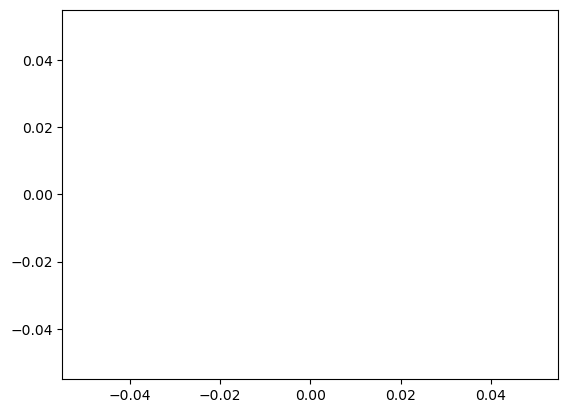

In [6]:
fig = plt.figure()
line1 = plt.plot([],[])[0]
line2 = plt.plot([],[])[0]

In [7]:
RATE = wf.getframerate()
BUFFER = chunk

r = range(0,int(RATE/2+1),int(RATE/BUFFER))
l = len(r)
r
l

572

In [8]:
def init_line():
        line1.set_data(r, [-1000]*l)
        line2.set_data(r, [-1000]*l)
        return (line1,line2,)

C:\Users\umerb\AppData\Local\Temp\ipykernel_6824\2754312398.py:29: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  line_ani = matplotlib.animation.FuncAnimation(


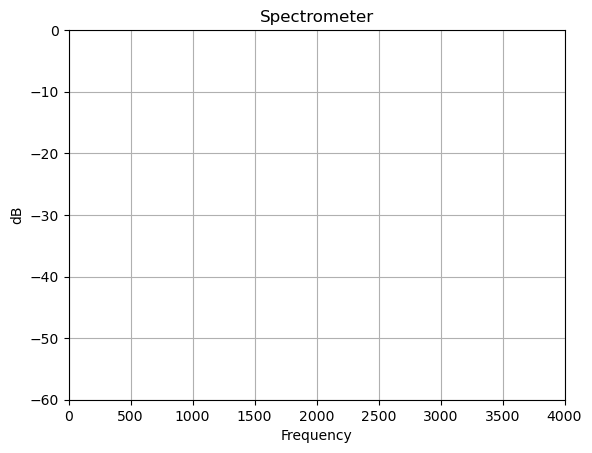

In [9]:
def update_line(i):
    try:
        dataraw = wf.readframes(chunk)
        datstream = stream.write(dataraw)
        datafin = stream.read(chunk)

        
        data = numpy.fft.rfft(numpy.fromstring(
            datafin, dtype=numpy.float32)
        )
    except IOError:
        pass
    try:
        data = numpy.log10(numpy.sqrt(
            numpy.real(data)**2+numpy.imag(data)**2) / BUFFER) * 10
    except:
        pass
    line1.set_data(r, data)
    line2.set_data(numpy.maximum(line1.get_data(), line2.get_data()))
    return (line1,line2,)

plt.xlim(0, RATE/2+1)
plt.ylim(-60, 0)
plt.xlabel('Frequency')
plt.ylabel('dB')
plt.title('Spectrometer')
plt.grid()

line_ani = matplotlib.animation.FuncAnimation(
    fig, update_line, init_func=init_line, interval=0, blit=True
)

plt.show()

In [10]:
# cleanup
# stream.close()
# p.terminate()

: 